In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
dfCarAndDriver = pd.read_excel("/gdrive/My Drive/Colab Notebooks/BD2021/Final Exercise/Car & Driver/Car&DriverData.xlsx")

In [4]:
dfCarAndDriver

headline  ...  date
0            Νέες πληροφορίες για το Tesla Cybertruck   ...   3/7
1     Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης π...  ...   3/7
2     Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό ...  ...   3/7
3     Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητ...  ...   1/7
4     Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   ...   1/7
..                                                 ...  ...   ...
169   Κριτική και στη Βρετανία για το Autopilot της...  ...  19/7
170   Η BMW θα παίρνει μπαταρίες από την Northvolt AB   ...  19/7
171   Οδηγούμε την Porsche Taycan Turbo S και το Te...  ...  19/7
172   Μια σύγχρονη και αμιγώς ηλεκτροκίνητη BMW 160...  ...   7/7
173   Έρευνα: Σε ποιες χώρες τα EV είναι ακόμη πιο ...  ...  13/2

[174 rows x 3 columns]

In [5]:
dfCarAndDriver.dtypes

headline    object
summary     object
date        object
dtype: object

In [6]:
dfCarAndDriver.shape

(174, 3)

In [7]:
dfCarAndDriver.describe

<bound method NDFrame.describe of                                               headline  ...  date
0            Νέες πληροφορίες για το Tesla Cybertruck   ...   3/7
1     Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης π...  ...   3/7
2     Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό ...  ...   3/7
3     Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητ...  ...   1/7
4     Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   ...   1/7
..                                                 ...  ...   ...
169   Κριτική και στη Βρετανία για το Autopilot της...  ...  19/7
170   Η BMW θα παίρνει μπαταρίες από την Northvolt AB   ...  19/7
171   Οδηγούμε την Porsche Taycan Turbo S και το Te...  ...  19/7
172   Μια σύγχρονη και αμιγώς ηλεκτροκίνητη BMW 160...  ...   7/7
173   Έρευνα: Σε ποιες χώρες τα EV είναι ακόμη πιο ...  ...  13/2

[174 rows x 3 columns]>

3. Καθάρισμα

In [8]:
#Δεν έχουμε καθόλου NaN Values
dfCarAndDriver.isnull()

headline  summary   date
0       False    False  False
1       False    False  False
2       False    False  False
3       False    False  False
4       False    False  False
..        ...      ...    ...
169     False    False  False
170     False    False  False
171     False    False  False
172     False    False  False
173     False    False  False

[174 rows x 3 columns]

In [9]:
dfCarAndDriver['headline'] = dfCarAndDriver['headline'].str.replace("ηλεκτρικά", "ηλεκτρικό")
dfCarAndDriver['headline'] = dfCarAndDriver['headline'].str.replace("ηλεκτρική", "ηλεκτρικό")
dfCarAndDriver['headline'] = dfCarAndDriver['headline'].str.replace("ηλεκτρικός", "ηλεκτρικό")

In [10]:
dfCarAndDriver['headline'] = dfCarAndDriver['headline'].str.replace(r'https?:\/\/.*[\r\n]*',"")

In [11]:
dfCarAndDriver['headline'] 

0              Νέες πληροφορίες για το Tesla Cybertruck 
1       Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης π...
2       Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό ...
3       Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητ...
4       Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine 
                             ...                        
169     Κριτική και στη Βρετανία για το Autopilot της...
170     Η BMW θα παίρνει μπαταρίες από την Northvolt AB 
171     Οδηγούμε την Porsche Taycan Turbo S και το Te...
172     Μια σύγχρονη και αμιγώς ηλεκτροκίνητη BMW 160...
173     Έρευνα: Σε ποιες χώρες τα EV είναι ακόμη πιο ...
Name: headline, Length: 174, dtype: object

In [12]:
CarAndDriverHeader = dfCarAndDriver['headline'] .str.cat(sep = ' ').replace("amp", ' ')

In [13]:
CarAndDriverHeader

' Νέες πληροφορίες για το Tesla Cybertruck   Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης που δεν έχετε ξαναδεί!   Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό off-roader με 400 ίππους!   Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητες για τα EVs της Volvo Cars    Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   Volvo Concept Recharge: Ηλεκτροκίνητο σουηδικό... living room\n\n   Φθηνά Ηλεκτρικά Αυτοκίνητα: Αυτό είναι το Tesla των 21.000 ευρώ!   Aston Martin Valkyrie AMR Pro: Hypercar-αριστούργημα με πλευρική επιτάχυνση 3G!   Η Mitsubishi θα λανσάρει το ηλεκτρικό αυτοκίνητο του... λαού!   Elegend EL1: Το θρυλικό Audi Quattro επιστρέφει με επιδόσεις που ζαλίζουν!   Πόσες πιθανότητες υπάρχουν να επιστρέψει το Honda S2000;   Audi E-Tron 2023: Σε επίπεδα... Tesla η αυτονομία του   To Tesla Model S Plaid σπάει τα χρονόμετρα στο Pikes Peak (video)   2021-2050: Το δεσμευτικό χρονοδιάγραμμα των κατασκευαστών προς την ηλεκτροκίνηση   Η Fisker κατασκευάζει ένα ηλεκτρικό αυτοκίνητο για τον Πάπα   

4. Αφαίρεση Stopwords, Lemmatization, 7. Wordcloud**

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [15]:
list(STOPWORDS)[0:20]

['own',
 "isn't",
 "he'd",
 'would',
 'before',
 'so',
 'most',
 "i'll",
 "he's",
 'under',
 'with',
 'there',
 'having',
 'do',
 'are',
 "hasn't",
 'while',
 'how',
 "wasn't",
 'on']

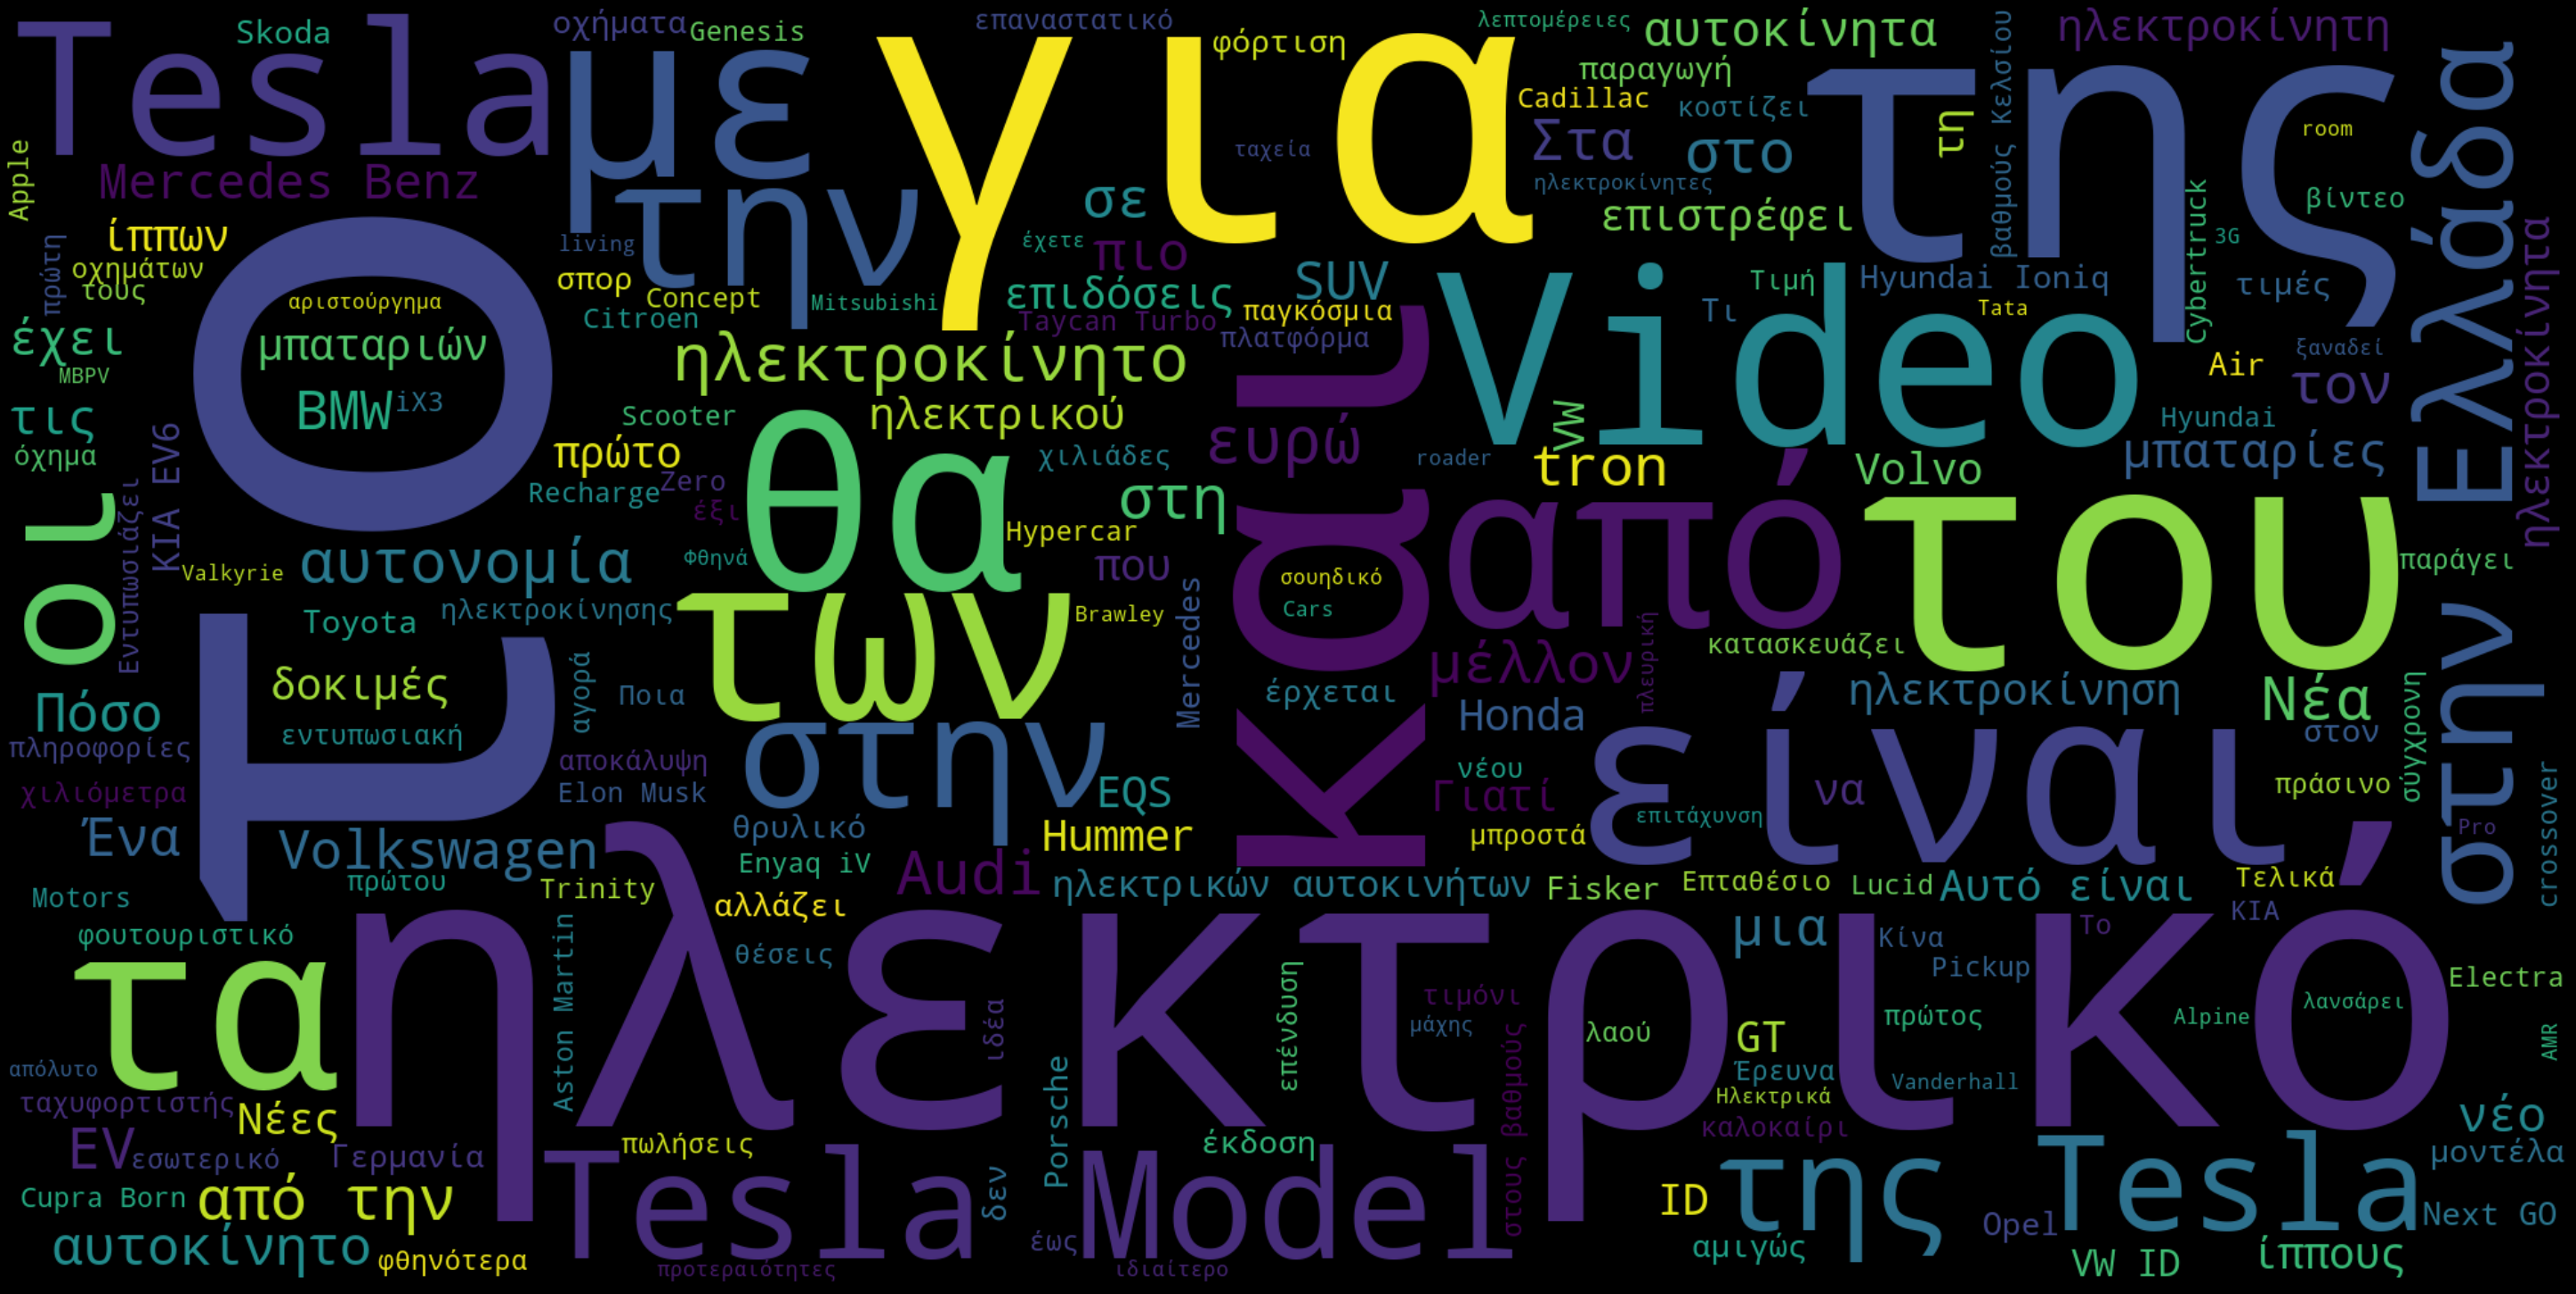

In [16]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(CarAndDriverHeader)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
import spacy

In [18]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [19]:
nlp = spacy.load('el_core_news_sm')

In [20]:
list(nlp.Defaults.stop_words)[0:20]

['πρέπει',
 'όσος',
 'έχετε',
 'αι',
 'όλην',
 'συχνήν',
 'εσάς',
 'πέρα',
 'η',
 'κανέναν',
 'ίδιους',
 'αλλαχού',
 'ω',
 'έγκαιρα',
 'ούτε',
 'πίσω',
 'κάμποσοι',
 'ετέρα',
 'τους',
 'δίπλα']

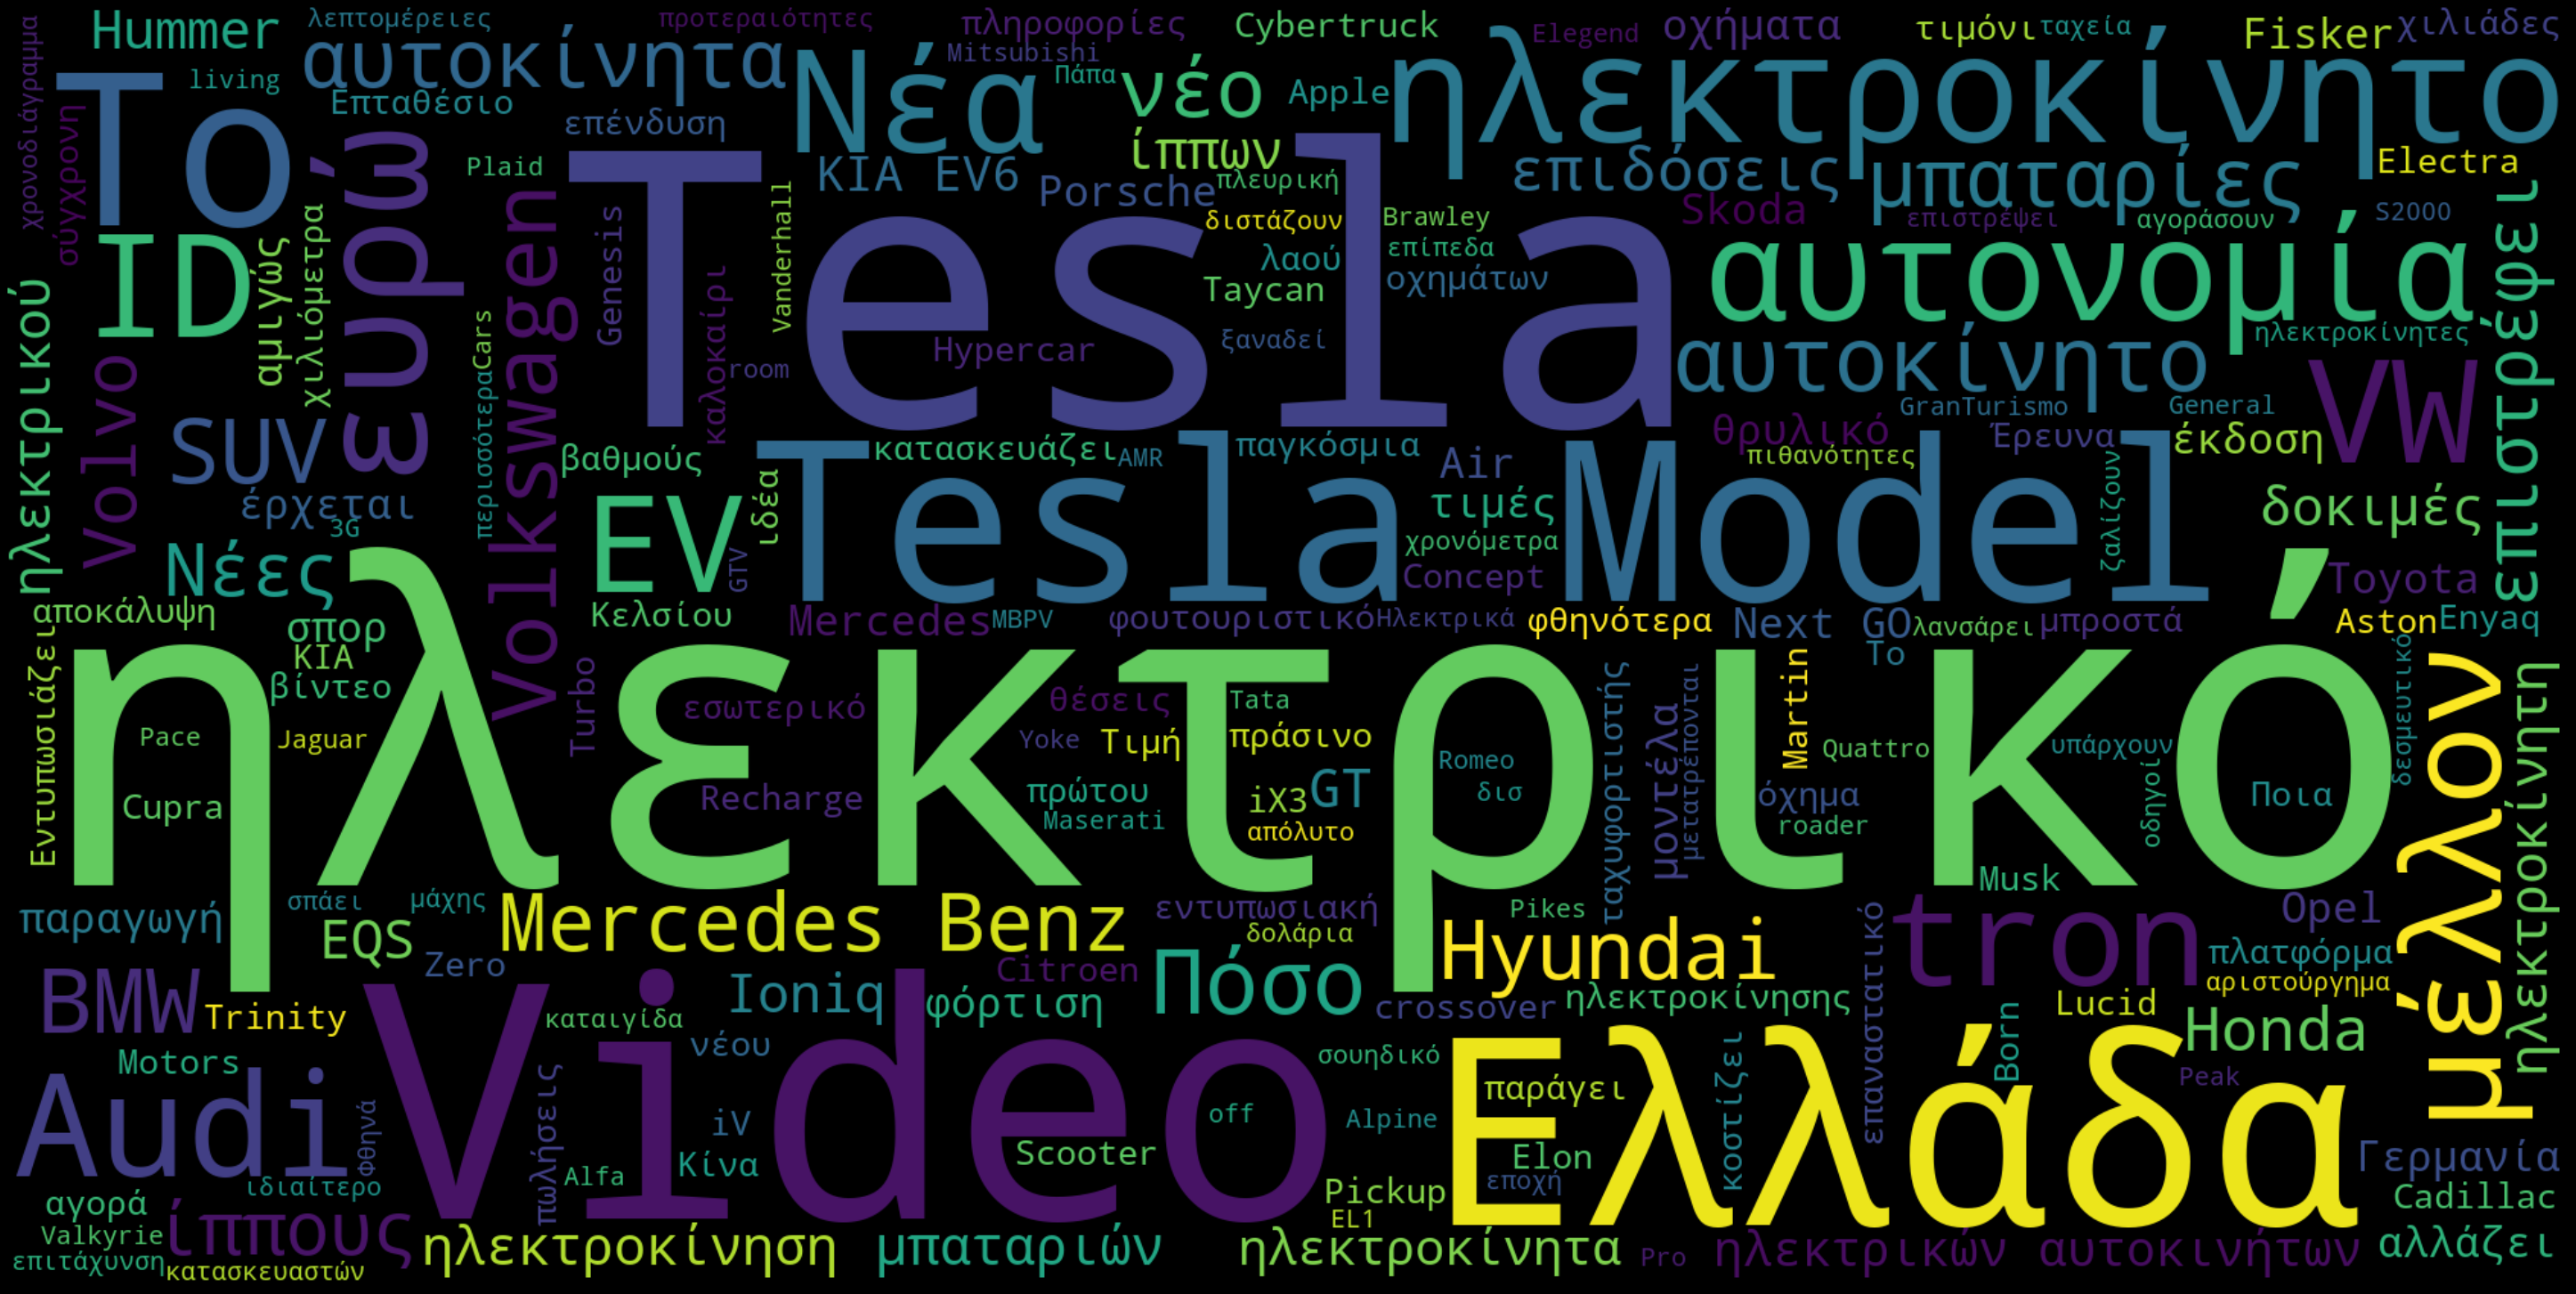

In [21]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(CarAndDriverHeader)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας βρούμε για καθε λέξη που βρίσκεται σε διαφορετικές πτώσεις στην ονομαστική, και τα ρήματα στο 1ο πρόσωπο... Lemmatization

In [22]:
doc = nlp(dfCarAndDriver['headline'][1])

In [23]:
for token in doc:
    print(token, token.lemma_)

   
Tata tata
Motors motors
MBPV mbpv
: :
Ένα ένα
ιδιαίτερο ιδιαίτερος
όχημα όχημα
μάχης μάχης
που που
δεν δεν
έχετε έχω
ξαναδεί ξαναδεί
! !


In [24]:
' '.join(token.lemma_ for token in doc)

'  tata motors mbpv : ένα ιδιαίτερος όχημα μάχης που δεν έχω ξαναδεί !'

In [25]:
CarAndDriverHeader

' Νέες πληροφορίες για το Tesla Cybertruck   Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης που δεν έχετε ξαναδεί!   Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό off-roader με 400 ίππους!   Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητες για τα EVs της Volvo Cars    Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   Volvo Concept Recharge: Ηλεκτροκίνητο σουηδικό... living room\n\n   Φθηνά Ηλεκτρικά Αυτοκίνητα: Αυτό είναι το Tesla των 21.000 ευρώ!   Aston Martin Valkyrie AMR Pro: Hypercar-αριστούργημα με πλευρική επιτάχυνση 3G!   Η Mitsubishi θα λανσάρει το ηλεκτρικό αυτοκίνητο του... λαού!   Elegend EL1: Το θρυλικό Audi Quattro επιστρέφει με επιδόσεις που ζαλίζουν!   Πόσες πιθανότητες υπάρχουν να επιστρέψει το Honda S2000;   Audi E-Tron 2023: Σε επίπεδα... Tesla η αυτονομία του   To Tesla Model S Plaid σπάει τα χρονόμετρα στο Pikes Peak (video)   2021-2050: Το δεσμευτικό χρονοδιάγραμμα των κατασκευαστών προς την ηλεκτροκίνηση   Η Fisker κατασκευάζει ένα ηλεκτρικό αυτοκίνητο για τον Πάπα   

In [26]:
full_doc = nlp(CarAndDriverHeader)

In [27]:
full_doc

 Νέες πληροφορίες για το Tesla Cybertruck   Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης που δεν έχετε ξαναδεί!   Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό off-roader με 400 ίππους!   Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητες για τα EVs της Volvo Cars    Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   Volvo Concept Recharge: Ηλεκτροκίνητο σουηδικό... living room

   Φθηνά Ηλεκτρικά Αυτοκίνητα: Αυτό είναι το Tesla των 21.000 ευρώ!   Aston Martin Valkyrie AMR Pro: Hypercar-αριστούργημα με πλευρική επιτάχυνση 3G!   Η Mitsubishi θα λανσάρει το ηλεκτρικό αυτοκίνητο του... λαού!   Elegend EL1: Το θρυλικό Audi Quattro επιστρέφει με επιδόσεις που ζαλίζουν!   Πόσες πιθανότητες υπάρχουν να επιστρέψει το Honda S2000;   Audi E-Tron 2023: Σε επίπεδα... Tesla η αυτονομία του   To Tesla Model S Plaid σπάει τα χρονόμετρα στο Pikes Peak (video)   2021-2050: Το δεσμευτικό χρονοδιάγραμμα των κατασκευαστών προς την ηλεκτροκίνηση   Η Fisker κατασκευάζει ένα ηλεκτρικό αυτοκίνητο για τον Πάπα   Η A

Vectorization

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [29]:
count_vector = cv.fit_transform(dfCarAndDriver['headline'])

In [30]:
count_vector.shape

(174, 677)

In [31]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  001  069  12  1602  19  ...  ως  όλες  όλο  όμιλο  όχημα  ώρα
0    0    0    0   0     0   0  ...   0     0    0      0      0    0
1    0    0    0   0     0   0  ...   0     0    0      0      1    0
2    0    0    0   0     0   0  ...   0     0    0      0      0    0
3    0    0    0   0     0   0  ...   0     0    0      0      0    0
4    0    0    0   0     0   0  ...   0     0    0      0      0    0

[5 rows x 677 columns]

In [32]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [33]:
count_vector = cv.fit_transform(dfCarAndDriver['headline'])

In [34]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head(20)

000  200  2021  2025  ...  φόρτιση  χιλιάδες  χιλιόμετρα  όχημα
0     0    0     0     0  ...        0         0           0      0
1     0    0     0     0  ...        0         0           0      1
2     0    0     0     0  ...        0         0           0      0
3     0    0     0     0  ...        1         0           0      0
4     0    0     0     0  ...        0         0           0      0
5     0    0     0     0  ...        0         0           0      0
6     1    0     0     0  ...        0         0           0      0
7     0    0     0     0  ...        0         0           0      0
8     0    0     0     0  ...        0         0           0      0
9     0    0     0     0  ...        0         0           0      0
10    0    0     0     0  ...        0         0           0      0
11    0    0     0     0  ...        0         0           0      0
12    0    0     0     0  ...        0         0           0      0
13    0    0     1     0  ...        0         0           0      0
14    0    0     0     0  ...        0         0           0      0
15    0    0     0     0  ...        0         0           0      0
16    0    0     0     0  ...        0         0           0      0
17    0    0     0     0  ...        0         0           0      0
18    0    0     0     0  ...        0         0           0      0
19    0    0     0     0  ...        0         0           0      0

[20 rows x 147 columns]

In [35]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [36]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfCarAndDriver['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστα', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποία', 'ποιής', 'ποιώ', 'πολλός', 'προχθή', 'προχτά', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


\n\n   ...  2021  2025  ...  φόρτιση  χιλιόμετρο  χώρα  όχημα
0      0    0     0     0  ...        0           0     0      0
1      0    0     0     0  ...        0           0     0      1
2      0    0     0     0  ...        0           0     0      0
3      0    0     0     0  ...        1           0     0      0
4      0    0     0     0  ...        0           0     0      0

[5 rows x 134 columns]

In [37]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfCarAndDriver['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

audi  bmw  id  kia  mercedes  ...  ηλεκτρικό  ηλεκτροκίνητο  μέλλον  νέα  πόσο
0     0    0   0    0         0  ...          0              0       0    0     0
1     0    0   0    0         0  ...          0              0       0    0     0
2     0    0   0    0         0  ...          1              0       0    0     0
3     0    0   0    0         0  ...          0              0       0    0     0
4     0    0   0    0         0  ...          0              0       0    0     0

[5 rows x 20 columns]

In [38]:
results.sum(axis =0).sort_values(ascending = False)

tesla            34
ηλεκτρικό        32
video            17
ελλάδα           10
model            10
to                9
ηλεκτροκίνητο     9
ευρώ              9
id                8
mercedes          8
audi              8
νέα               8
vw                8
αυτονομία         8
tron              7
μέλλον            7
αυτοκίνητο        6
kia               6
bmw               6
πόσο              6
dtype: int64

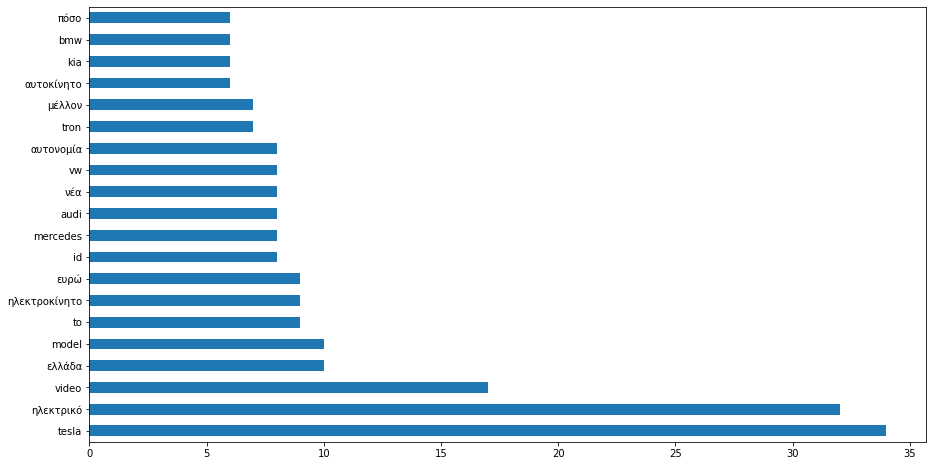

In [39]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind="barh", figsize=(15, 8)) 

In [40]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bηλ[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfCarAndDriver['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

ηλεκτρικά  ηλεκτρικές  ...  ηλεκτροκίνητου  ηλεκτροκινητήρα
0          0           0  ...               0                0
1          0           0  ...               0                0
2          0           0  ...               0                0
3          0           0  ...               0                0
4          0           0  ...               0                0

[5 rows x 10 columns]

In [41]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bμπα[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfCarAndDriver['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

μπαταρίες
0          0
1          0
2          0
3          0
4          0

In [42]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfCarAndDriver['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000 ευρώ  900 ευρώ  ...  ηλεκτρικών αυτοκινήτων  πόσο κοστίζει
0         0         0  ...                       0              0
1         0         0  ...                       0              0
2         0         0  ...                       0              0
3         0         0  ...                       0              0
4         0         0  ...                       0              0

[5 rows x 20 columns]

In [43]:
results.sum(axis =0).sort_values(ascending = False)

tesla model               10
mercedes benz              5
vw id                      4
kia ev6                    4
ηλεκτρικών αυτοκινήτων     4
000 ευρώ                   4
volkswagen id              3
ηλεκτρικό αυτοκίνητα       3
next go                    3
ηλεκτρικό αυτοκίνητο       3
ηλεκτρικό μέλλον           3
hyundai ioniq              3
audi tron                  3
έρχεται ηλεκτρικό          2
επιστρέφει ηλεκτρικό       2
to tesla                   2
lucid air                  2
benz eqs                   2
900 ευρώ                   2
πόσο κοστίζει              2
dtype: int64

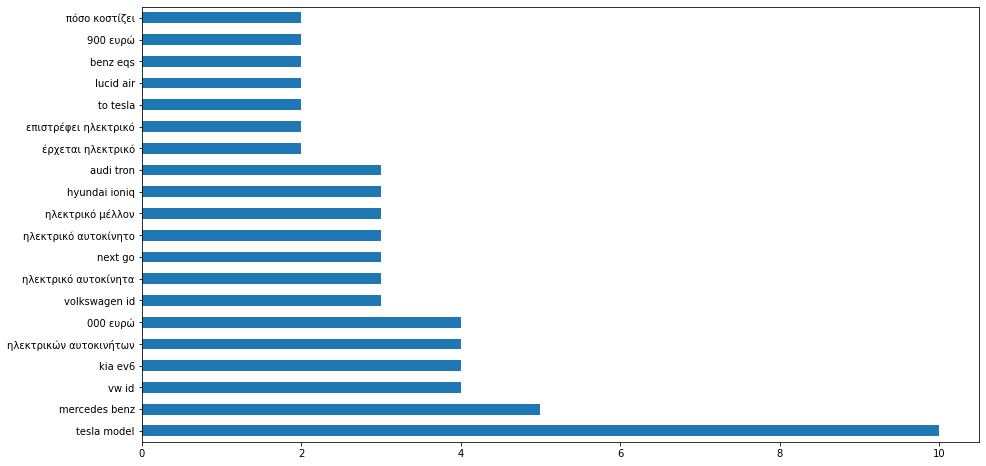

In [44]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind="barh", figsize=(15, 8)) 

In [45]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bαυτ[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfCarAndDriver['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

αυτοκίνητα  αυτοκίνητο  αυτοκινήτου  αυτοκινήτων  αυτονομία  αυτονομίας
0           0           0            0            0          0           0
1           0           0            0            0          0           0
2           0           0            0            0          0           0
3           0           0            0            0          1           0
4           0           0            0            0          0           0

In [46]:
results.sum(axis =0).sort_values(ascending = False)

αυτονομία      8
αυτοκίνητο     6
αυτοκίνητα     5
αυτοκινήτων    4
αυτονομίας     1
αυτοκινήτου    1
dtype: int64

11. Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτιση αυτή μέσω γραφήματος τύπου heatmap.

In [46]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['αυτονομία', 'μπαταρία', 'ηλεκτρικό', 'ηλεκτροκινητήρας', 'tesla', 'ηλεκτροκίνηση', 'υβριδικό', 'υδρογόνο', 'κινητήρας', 'καύσης', 'ΔΕΗ', 'φόρτιση']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfCarAndDriver['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head(20)

αυτονομία  μπαταρία  ηλεκτρικό  ...  καύσης  ΔΕΗ  φόρτιση
0           0         0          0  ...       0    0        0
1           0         0          0  ...       0    0        0
2           0         0          1  ...       0    0        0
3           1         0          0  ...       0    0        1
4           0         0          0  ...       0    0        0
5           0         0          0  ...       0    0        0
6           0         0          0  ...       0    0        0
7           0         0          0  ...       0    0        0
8           0         0          1  ...       0    0        0
9           0         0          0  ...       0    0        0
10          0         0          0  ...       0    0        0
11          1         0          0  ...       0    0        0
12          0         0          0  ...       0    0        0
13          0         0          0  ...       0    0        0
14          0         0          1  ...       0    0        0
15          0         0          1  ...       0    0        0
16          0         0          0  ...       0    0        0
17          0         0          0  ...       0    0        0
18          0         0          1  ...       0    0        0
19          0         0          0  ...       0    0        0

[20 rows x 12 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(dfCarAndDriver['headline'])  #finds the tfidf score with normalization

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000  001  069   12  1602  ...  χώρα  χώρες  ψαλιδίζει  όμιλο     όχημα
0  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0        0.0    0.0  0.000000
1  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0        0.0    0.0  0.387321
2  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0        0.0    0.0  0.000000
3  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0        0.0    0.0  0.000000
4  0.0  0.0  0.0  0.0   0.0  ...   0.0    0.0        0.0    0.0  0.000000

[5 rows x 500 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.         0.         0.         0.22218304 0.
  0.06764279 0.         0.         0.         0.         0.07118774
  0.05471182 0.         0.         0.         0.07187984 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.07977199 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.08524427 0.         0.         0.         0.07798832 0.
  0.06256728 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.06459408
  0.05856373 0.12390181 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.09058998
  0.06127933 0.         0.         0.         0.         

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.         0.         ... 0.06156735 0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.06156735 0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

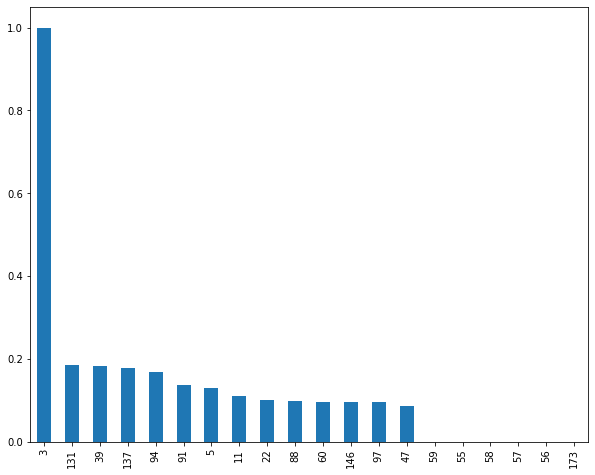

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = [10,8])

#6. Να πραγματοποιήσετε αναλύσεις στα αριθμητικά δεδομένα σας και να δημιουργήσετε τα αντίστοιχα γραφήματα, τα οποία δείχνουν χαρακτηριστικά και συσχετίσεις που κρύβουν τα δεδομένα σας.

Διάγραμμα με τις 20 πιο συχνές λέξεις

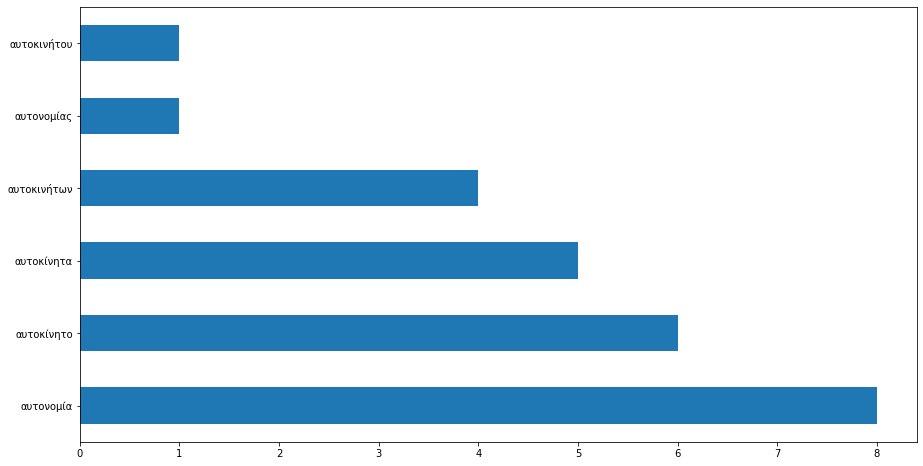

In [45]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind="barh", figsize=(15, 8)) 

In [47]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfCarAndDriver['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

κυριαρχία  κυψέλες
0          0        0
1          0        0
2          0        0
3          0        0
4          0        0

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfCarAndDriver['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000 ευρώ  900 ευρώ  ...  ηλεκτρικών αυτοκινήτων  πόσο κοστίζει
0         0         0  ...                       0              0
1         0         0  ...                       0              0
2         0         0  ...                       0              0
3         0         0  ...                       0              0
4         0         0  ...                       0              0

[5 rows x 20 columns]

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

tesla model               10
mercedes benz              5
000 ευρώ                   4
ηλεκτρικά αυτοκίνητα       4
kia ev6                    4
vw id                      4
ηλεκτρικών αυτοκινήτων     4
audi tron                  3
hyundai ioniq              3
next go                    3
volkswagen id              3
ηλεκτρικό αυτοκίνητο       3
ηλεκτρικό μέλλον           3
to tesla                   2
lucid air                  2
έρχεται ηλεκτρική          2
cupra born                 2
benz eqs                   2
900 ευρώ                   2
πόσο κοστίζει              2
dtype: int64

Διάγραμμα με τις 20 συχνότερες φράσεις

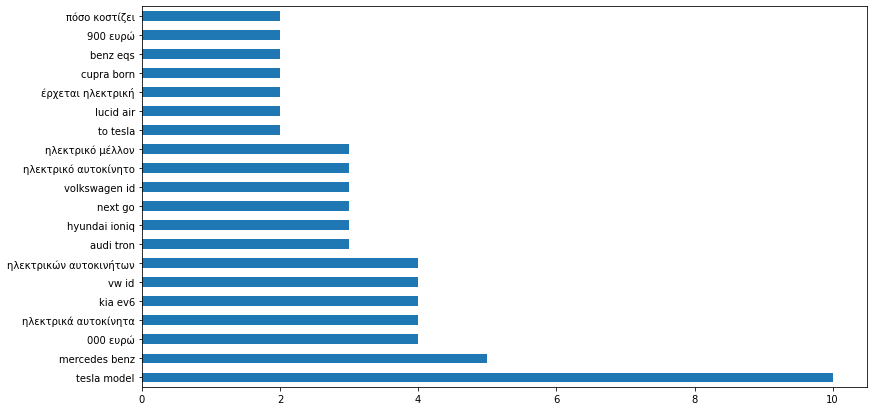

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(20).plot(kind="barh", figsize=(13, 7)) 

#5. Πάμε να φτιάξουμε μία νέα στήλη ημερομηνίας, ώστε να είναι μετά αξιοποιήσιμη στο index. Αυτήν τη στιγμή μας λείπει η χρονολογία, κάτι σημαντικό αφού υπάρχουν άρθρα και από το 2021 και από το 2020.

In [48]:
Hmeromhnia = dfCarAndDriver['date'].iloc[:120] + '/2021'
Hmeromhnia

0       3/7/2021
1       3/7/2021
2       3/7/2021
3       1/7/2021
4       1/7/2021
         ...    
115     4/2/2021
116     2/2/2021
117    28/1/2021
118    26/1/2021
119    25/1/2021
Name: date, Length: 120, dtype: object

In [49]:
Hmeromhnia = dfCarAndDriver['date'].iloc[120:] + '/2020'
Hmeromhnia

120    16/12/2020
121    16/12/2020
122    16/12/2020
123    25/11/2020
124    17/11/2020
125    13/11/2020
126    23/10/2020
127     8/10/2020
128     30/9/2020
129     29/9/2020
130     25/9/2020
131     22/9/2020
132     22/9/2020
133     15/9/2020
134     12/9/2020
135     12/9/2020
136     11/9/2020
137     11/9/2020
138      8/9/2020
139      8/9/2020
140      7/9/2020
141      7/9/2020
142      7/9/2020
143      7/9/2020
144     31/8/2020
145     13/8/2020
146     11/8/2020
147     11/8/2020
148     10/8/2020
149      7/8/2020
150      5/8/2020
151      4/8/2020
152      1/8/2020
153     31/7/2020
154     30/7/2020
155     30/7/2020
156     30/7/2020
157     29/7/2020
158     29/7/2020
159     28/7/2020
160     28/7/2020
161     28/7/2020
162     28/7/2020
163     28/7/2020
164     27/7/2020
165     27/7/2020
166     21/7/2020
167     20/7/2020
168     20/7/2020
169     19/7/2020
170     19/7/2020
171     19/7/2020
172      7/7/2020
173     13/2/2020
Name: date, dtype: object

In [50]:
dfCarAndDriver['date'].iloc[:120] = dfCarAndDriver['date'].iloc[:120] + '/2021'
dfCarAndDriver['date'].iloc[120:] = dfCarAndDriver['date'].iloc[120:] + '/2020'
dfCarAndDriver['date']

0       3/7/2021
1       3/7/2021
2       3/7/2021
3       1/7/2021
4       1/7/2021
         ...    
169    19/7/2020
170    19/7/2020
171    19/7/2020
172     7/7/2020
173    13/2/2020
Name: date, Length: 174, dtype: object

In [51]:
dfCarAndDriver['finaldate'] =  pd.to_datetime(dfCarAndDriver['date'])

In [52]:
dfCarAndDriver['finaldate']

0     2021-03-07
1     2021-03-07
2     2021-03-07
3     2021-01-07
4     2021-01-07
         ...    
169   2020-07-19
170   2020-07-19
171   2020-07-19
172   2020-07-07
173   2020-02-13
Name: finaldate, Length: 174, dtype: datetime64[ns]

In [53]:
dfCarAndDriver

headline  ...  finaldate
0            Νέες πληροφορίες για το Tesla Cybertruck   ... 2021-03-07
1     Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης π...  ... 2021-03-07
2     Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό ...  ... 2021-03-07
3     Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητ...  ... 2021-01-07
4     Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   ... 2021-01-07
..                                                 ...  ...        ...
169   Κριτική και στη Βρετανία για το Autopilot της...  ... 2020-07-19
170   Η BMW θα παίρνει μπαταρίες από την Northvolt AB   ... 2020-07-19
171   Οδηγούμε την Porsche Taycan Turbo S και το Te...  ... 2020-07-19
172   Μια σύγχρονη και αμιγώς ηλεκτροκίνητη BMW 160...  ... 2020-07-07
173   Έρευνα: Σε ποιες χώρες τα EV είναι ακόμη πιο ...  ... 2020-02-13

[174 rows x 4 columns]

In [54]:
#διώχνουμε και το αρχικό date, που πλέον δεν χρησιμεύει σε κάτι
dfCarAndDriver.drop(['date'], axis=1)

headline  ...  finaldate
0            Νέες πληροφορίες για το Tesla Cybertruck   ... 2021-03-07
1     Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης π...  ... 2021-03-07
2     Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό ...  ... 2021-03-07
3     Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητ...  ... 2021-01-07
4     Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   ... 2021-01-07
..                                                 ...  ...        ...
169   Κριτική και στη Βρετανία για το Autopilot της...  ... 2020-07-19
170   Η BMW θα παίρνει μπαταρίες από την Northvolt AB   ... 2020-07-19
171   Οδηγούμε την Porsche Taycan Turbo S και το Te...  ... 2020-07-19
172   Μια σύγχρονη και αμιγώς ηλεκτροκίνητη BMW 160...  ... 2020-07-07
173   Έρευνα: Σε ποιες χώρες τα EV είναι ακόμη πιο ...  ... 2020-02-13

[174 rows x 3 columns]

In [55]:
dfCarAndDriver.dtypes

headline             object
summary              object
date                 object
finaldate    datetime64[ns]
dtype: object

#8 Κάνω την ημερομηνία index
(Αφού μπει συναισθηματικό πρόσημο στις λέξεις κάθε τίτλου)

In [ ]:
dfCarAndDriver.set_index('finaldate' , inplace=True)

In [ ]:
dfCarAndDriver

headline  ...       date
finaldate                                                      ...           
2021-03-07          Νέες πληροφορίες για το Tesla Cybertruck   ...   3/7/2021
2021-03-07   Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης π...  ...   3/7/2021
2021-03-07   Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό ...  ...   3/7/2021
2021-01-07   Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητ...  ...   1/7/2021
2021-01-07   Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   ...   1/7/2021
...                                                       ...  ...        ...
2020-07-19   Κριτική και στη Βρετανία για το Autopilot της...  ...  19/7/2020
2020-07-19   Η BMW θα παίρνει μπαταρίες από την Northvolt AB   ...  19/7/2020
2020-07-19   Οδηγούμε την Porsche Taycan Turbo S και το Te...  ...  19/7/2020
2020-07-07   Μια σύγχρονη και αμιγώς ηλεκτροκίνητη BMW 160...  ...   7/7/2020
2020-02-13   Έρευνα: Σε ποιες χώρες τα EV είναι ακόμη πιο ...  ...  13/2/2020

[174 rows x 3 columns]

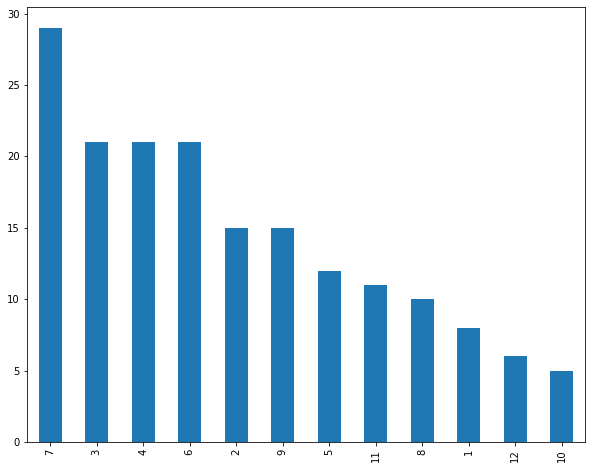

In [ ]:
dfCarAndDriver.index.month.value_counts().sort_values(axis=0, ascending=False).plot(kind = 'bar', figsize = [10,8])

In [ ]:
dfCarAndDriver[dfCarAndDriver.index.month == 7]

headline  ...       date
finaldate                                                      ...           
2021-07-05   Η εντυπωσιακή Estrema Fulminea, το hypercar τ...  ...   7/5/2021
2021-07-05   Αυτή είναι μια ηλεκτρική Lancia Delta Integra...  ...   7/5/2021
2021-07-05   Έρευνα: Πόσο ικανοποιημένοι είναι οι κάτοχοι ...  ...   7/5/2021
2021-07-04   Δοκιμές στους -30 βαθμούς Κελσίου για το Cupr...  ...   7/4/2021
2020-07-09   Volta Zero: Τα ηλεκτροκίνητα φορτηγά από τη Σ...  ...   7/9/2020
2020-07-09   VW ID.4: Το ηλεκτροκίνητο crossover του λαού ...  ...   7/9/2020
2020-07-09   Το Lucid Air ντροπιάζει το Tesla Model S στη ...  ...   7/9/2020
2020-07-09         Τι στόχο έχει η Volkswagen για την Tesla;   ...   7/9/2020
2020-07-08   Αποκαλύφθηκε η Cadillac Lyriq EV με οθόνη αφή...  ...   7/8/2020
2020-07-31   Ξεκινούν οι πωλήσεις Tesla στην Ελλάδα. Τιμές...  ...  31/7/2020
2020-07-30      Οι τιμές του ηλεκτρικού Honda e στην Ελλάδα    ...  30/7/2020
2020-07-30   Όλες οι νέες τιμές των ηλεκτρικών αυτοκινήτων...  ...  30/7/2020
2020-07-30   Το φθινόπωρο η παρουσίαση του ηλεκτροκίνητου ...  ...  30/7/2020
2020-07-29   Από 67.900 ευρώ η ηλεκτροκίνητη BMW iX3. Στην...  ...  29/7/2020
2020-07-29   Η Yamaha παρουσιάζει τον ηλεκτροκινητήρα θαύμ...  ...  29/7/2020
2020-07-28     Οδηγός αγοράς: Τι να διαλέξω Hatchback ή SUV;   ...  28/7/2020
2020-07-28   Γιατί ένα ηλεκτρικό όχημα απαιτεί ειδικά ελασ...  ...  28/7/2020
2020-07-28   To προσιτό ηλεκτρικό scooter της Unu περνά στ...  ...  28/7/2020
2020-07-28   Αμιγώς ηλεκτρικές εκδόσεις για τις επόμενες B...  ...  28/7/2020
2020-07-28        Audi: Η Tesla βρίσκεται δύο χρόνια μπροστά   ...  28/7/2020
2020-07-27   Διαπραγματεύσεις για την παραγωγή ηλεκτρικού ...  ...  27/7/2020
2020-07-27   VW ID.3 1st Edition: Στην Ελλάδα από 39.600 ε...  ...  27/7/2020
2020-07-21   Αυξάνεται το ποσοστό επιδότησης για τα φθηνότ...  ...  21/7/2020
2020-07-20   Οι μπαταρίες ρητινών είναι 90% φθηνότερες από...  ...  20/7/2020
2020-07-20   700 χιλιόμετρα αυτονομίας για τη Mercedes-Ben...  ...  20/7/2020
2020-07-19   Κριτική και στη Βρετανία για το Autopilot της...  ...  19/7/2020
2020-07-19   Η BMW θα παίρνει μπαταρίες από την Northvolt AB   ...  19/7/2020
2020-07-19   Οδηγούμε την Porsche Taycan Turbo S και το Te...  ...  19/7/2020
2020-07-07   Μια σύγχρονη και αμιγώς ηλεκτροκίνητη BMW 160...  ...   7/7/2020

[29 rows x 3 columns]

#9	Κάνοντας χρήση του ελληνικού λεξικού για sentiment anaysis του NRC βρείτε την πολικότητα (θετική - αρνητική) και τα συναισθήματα των κειμένων σας, και αποθηκεύστε τα σε νέες στήλες στο dataframe των δεδομένων σας.

In [56]:
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [57]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [58]:
CarAndDriverHeadline = dfCarAndDriver['headline'].str.cat(sep = ' ').replace("amp", '')

In [59]:
CarAndDriverHeadline

' Νέες πληροφορίες για το Tesla Cybertruck   Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης που δεν έχετε ξαναδεί!   Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό off-roader με 400 ίππους!   Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητες για τα EVs της Volvo Cars    Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   Volvo Concept Recharge: Ηλεκτροκίνητο σουηδικό... living room\n\n   Φθηνά Ηλεκτρικά Αυτοκίνητα: Αυτό είναι το Tesla των 21.000 ευρώ!   Aston Martin Valkyrie AMR Pro: Hypercar-αριστούργημα με πλευρική επιτάχυνση 3G!   Η Mitsubishi θα λανσάρει το ηλεκτρικό αυτοκίνητο του... λαού!   Elegend EL1: Το θρυλικό Audi Quattro επιστρέφει με επιδόσεις που ζαλίζουν!   Πόσες πιθανότητες υπάρχουν να επιστρέψει το Honda S2000;   Audi E-Tron 2023: Σε επίπεδα... Tesla η αυτονομία του   To Tesla Model S Plaid σπάει τα χρονόμετρα στο Pikes Peak (video)   2021-2050: Το δεσμευτικό χρονοδιάγραμμα των κατασκευαστών προς την ηλεκτροκίνηση   Η Fisker κατασκευάζει ένα ηλεκτρικό αυτοκίνητο για τον Πάπα   

In [60]:
nlp = spacy.load('el_core_news_sm')

In [61]:
list(nlp.Defaults.stop_words)[0:10]

['πρέπει',
 'όσος',
 'έχετε',
 'αι',
 'όλην',
 'συχνήν',
 'εσάς',
 'πέρα',
 'η',
 'κανέναν']

In [62]:
CarAndDriverdoc = nlp(dfCarAndDriver['headline'][1])

In [63]:
CarAndDriverdoc

 Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης που δεν έχετε ξαναδεί! 

In [64]:
for token in CarAndDriverdoc:
    print(token, token.lemma_)

   
Tata tata
Motors motors
MBPV mbpv
: :
Ένα ένα
ιδιαίτερο ιδιαίτερος
όχημα όχημα
μάχης μάχης
που που
δεν δεν
έχετε έχω
ξαναδεί ξαναδεί
! !


In [65]:
CarAndDriverHeadline

' Νέες πληροφορίες για το Tesla Cybertruck   Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης που δεν έχετε ξαναδεί!   Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό off-roader με 400 ίππους!   Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητες για τα EVs της Volvo Cars    Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   Volvo Concept Recharge: Ηλεκτροκίνητο σουηδικό... living room\n\n   Φθηνά Ηλεκτρικά Αυτοκίνητα: Αυτό είναι το Tesla των 21.000 ευρώ!   Aston Martin Valkyrie AMR Pro: Hypercar-αριστούργημα με πλευρική επιτάχυνση 3G!   Η Mitsubishi θα λανσάρει το ηλεκτρικό αυτοκίνητο του... λαού!   Elegend EL1: Το θρυλικό Audi Quattro επιστρέφει με επιδόσεις που ζαλίζουν!   Πόσες πιθανότητες υπάρχουν να επιστρέψει το Honda S2000;   Audi E-Tron 2023: Σε επίπεδα... Tesla η αυτονομία του   To Tesla Model S Plaid σπάει τα χρονόμετρα στο Pikes Peak (video)   2021-2050: Το δεσμευτικό χρονοδιάγραμμα των κατασκευαστών προς την ηλεκτροκίνηση   Η Fisker κατασκευάζει ένα ηλεκτρικό αυτοκίνητο για τον Πάπα   

In [66]:
' '.join(token.lemma_ for token in CarAndDriverdoc)

'  tata motors mbpv : ένα ιδιαίτερος όχημα μάχης που δεν έχω ξαναδεί !'

In [67]:
CarAndDriverFull = nlp(CarAndDriverHeadline)

In [68]:
CarAndDriverClear = ' '.join(token.lemma_ for token in CarAndDriverFull)

In [69]:
CarAndDriverClear

'  νέες πληροφορία για το tesla cybertruck    tata motors mbpv : ένα ιδιαίτερος όχημα μάχης που δεν έχω ξαναδεί !    vanderhall brawley gts : to απόλυτος ηλεκτρικό off-roader με 400 ίππους !    αυτονομία και ταχείος φόρτιση : οι προτεραιότητα για τα evs της volvo cars     νέες λεπτομέρεια για τις ηλεκτροκίνητα alpine    volvo concept recharge : ηλεκτροκίνητος σουηδικό ... living room \n\n    φθηνώ ηλεκτρικά αυτοκίνητο : αυτό είναι το tesla των 21.000 ευρώ !    aston martin valkyrie amr pro : hypercar - αριστούργημα με πλευρικός επιτάχυνση 3 g !    η mitsubishi θα λανσάρω το ηλεκτρικό αυτοκίνητο του ... λαός !    elegend el1 : το θρυλικό audi quattro επιστρέφει με επιδόσει που ζαλίζω !    Πόσες πιθανότητα υπάρχω να επιστρέψω το honda s2000 ;    audi e-tron 2023 : σε επίπεδο ... tesla η αυτονομία του    to tesla model s plaid σπάω τα χρονόμετρας στο pikes peak ( video )    2021-2050 : το δεσμευτικό χρονοδιάγραμμα των κατασκευαστής προς την ηλεκτροκίνηση    η fisker κατασκευάζω ένα ηλεκτρ

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [71]:
count_vector = cv.fit_transform(dfCarAndDriver['headline'])

In [72]:
count_vector.shape

(174, 677)

In [73]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000  001  069  12  1602  19  ...  ως  όλες  όλο  όμιλο  όχημα  ώρα
0    0    0    0   0     0   0  ...   0     0    0      0      0    0
1    0    0    0   0     0   0  ...   0     0    0      0      1    0
2    0    0    0   0     0   0  ...   0     0    0      0      0    0
3    0    0    0   0     0   0  ...   0     0    0      0      0    0
4    0    0    0   0     0   0  ...   0     0    0      0      0    0

[5 rows x 677 columns]

In [74]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [75]:
count_vector = cv.fit_transform(dfCarAndDriver['headline'])

In [76]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head(20)

000  200  2021  2025  ...  φόρτιση  χιλιάδες  χιλιόμετρα  όχημα
0     0    0     0     0  ...        0         0           0      0
1     0    0     0     0  ...        0         0           0      1
2     0    0     0     0  ...        0         0           0      0
3     0    0     0     0  ...        1         0           0      0
4     0    0     0     0  ...        0         0           0      0
5     0    0     0     0  ...        0         0           0      0
6     1    0     0     0  ...        0         0           0      0
7     0    0     0     0  ...        0         0           0      0
8     0    0     0     0  ...        0         0           0      0
9     0    0     0     0  ...        0         0           0      0
10    0    0     0     0  ...        0         0           0      0
11    0    0     0     0  ...        0         0           0      0
12    0    0     0     0  ...        0         0           0      0
13    0    0     1     0  ...        0         0           0      0
14    0    0     0     0  ...        0         0           0      0
15    0    0     0     0  ...        0         0           0      0
16    0    0     0     0  ...        0         0           0      0
17    0    0     0     0  ...        0         0           0      0
18    0    0     0     0  ...        0         0           0      0
19    0    0     0     0  ...        0         0           0      0

[20 rows x 147 columns]

In [ ]:
#Για Sentiment Analysis να αποφύγω από εδώ

In [77]:
from html import unescape
def my_tokenizer(CarAndDriverdoc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(CarAndDriverdoc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [78]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfCarAndDriver['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστα', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποία', 'ποιής', 'ποιώ', 'πολλός', 'προχθή', 'προχτά', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


\n\n   ...  2021  2025  ...  φόρτιση  χιλιόμετρο  χώρα  όχημα
0      0    0     0     0  ...        0           0     0      0
1      0    0     0     0  ...        0           0     0      1
2      0    0     0     0  ...        0           0     0      0
3      0    0     0     0  ...        1           0     0      0
4      0    0     0     0  ...        0           0     0      0

[5 rows x 134 columns]

In [79]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfCarAndDriver['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστα', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποία', 'ποιής', 'ποιώ', 'πολλός', 'προχθή', 'προχτά', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


\n\n   audi  bmw  e-tron  ...  ηλεκτροκίνητος  μέλλον  νέος  πόσο
0      0     0    0       0  ...               0       0     0     0
1      0     0    0       0  ...               0       0     0     0
2      0     0    0       0  ...               0       0     0     0
3      0     0    0       0  ...               0       0     0     0
4      0     0    0       0  ...               0       0     0     0

[5 rows x 20 columns]

In [80]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bηλ[α-ωά-ώ]*\\b', tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfCarAndDriver['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστα', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποία', 'ποιής', 'ποιώ', 'πολλός', 'προχθή', 'προχτά', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


\n\n   audi  bmw  e-tron  ...  ηλεκτροκίνητος  μέλλον  νέος  πόσο
0      0     0    0       0  ...               0       0     0     0
1      0     0    0       0  ...               0       0     0     0
2      0     0    0       0  ...               0       0     0     0
3      0     0    0       0  ...               0       0     0     0
4      0     0    0       0  ...               0       0     0     0

[5 rows x 20 columns]

In [81]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2), token_pattern = '\\bηλ[α-ωά-ώ]*\\b', tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfCarAndDriver['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστα', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποία', 'ποιής', 'ποιώ', 'πολλός', 'προχθή', 'προχτά', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


aston martin  audi e-tron  bmw ix3  ...  νέος kia  πόσο κοστίζω  τιμή ηλεκτρικός
0             0            0        0  ...         0             0                0
1             0            0        0  ...         0             0                0
2             0            0        0  ...         0             0                0
3             0            0        0  ...         0             0                0
4             0            0        0  ...         0             0                0

[5 rows x 20 columns]

In [82]:
results.sum(axis =0).sort_values(ascending = False)

tesla model               10
audi e-tron                6
ηλεκτρικό αυτοκίνητο       6
ηλεκτρικός αυτοκινήτο      5
kia ev6                    4
ηλεκτρικό μέλλον           3
hyundai ioniq              3
τιμή ηλεκτρικός            2
mercedes eqs               2
bmw ix3                    2
cupra born                 2
lucid air                  2
tesla cybertruck           2
skoda enyaq                2
πόσο κοστίζω               2
αυτοκίνητο tesla           2
ηλεκτροκίνητη bmw          2
ηλεκτροκίνητος μοντέλο     2
νέος kia                   2
aston martin               2
dtype: int64

In [83]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(17)   

tesla model              10
audi e-tron               6
ηλεκτρικό αυτοκίνητο      6
ηλεκτρικός αυτοκινήτο     5
kia ev6                   4
ηλεκτρικό μέλλον          3
hyundai ioniq             3
τιμή ηλεκτρικός           2
mercedes eqs              2
bmw ix3                   2
cupra born                2
lucid air                 2
tesla cybertruck          2
skoda enyaq               2
πόσο κοστίζω              2
αυτοκίνητο tesla          2
ηλεκτροκίνητη bmw         2
dtype: int64

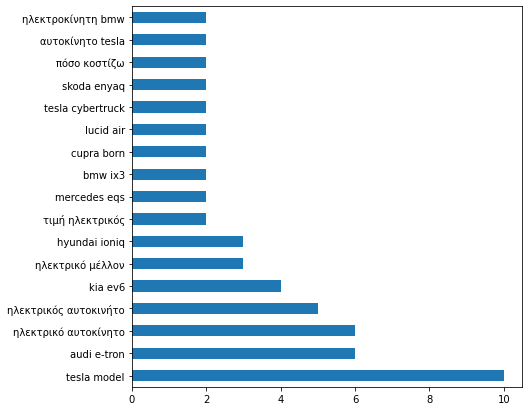

In [84]:
sum_words.sort_values(ascending = False).head(17).plot(kind = 'barh', figsize=(7,7))

In [ ]:
#μέχρι εδώ

In [85]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [86]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
0            αφεση       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
1  ενορκη βεβαιωση       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
2          εχοντας       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
3              εχω       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
4             οριο       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [87]:
emolex_df.tail()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
13166     ουρλιασμα       0.0       1.0    1.0  ...  0.0      0.0       1.0    0.0
13167  κροκος αυγου       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13168      νεοτερος       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13169       ζεφυρος       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13170          ζουμ       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [88]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [89]:
emolex_df.tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0
13157  13167  κροκος αυγου       0.0       0.0  ...  0.0      0.0       0.0    0.0
13158  13168      νεοτερος       1.0       0.0  ...  0.0      0.0       0.0    0.0
13159  13169       ζεφυρος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13160  13170          ζουμ       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [90]:
nlp = spacy.load("el_core_news_sm")

In [91]:
dfCarAndDriver

headline  ...  finaldate
0            Νέες πληροφορίες για το Tesla Cybertruck   ... 2021-03-07
1     Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης π...  ... 2021-03-07
2     Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό ...  ... 2021-03-07
3     Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητ...  ... 2021-01-07
4     Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   ... 2021-01-07
..                                                 ...  ...        ...
169   Κριτική και στη Βρετανία για το Autopilot της...  ... 2020-07-19
170   Η BMW θα παίρνει μπαταρίες από την Northvolt AB   ... 2020-07-19
171   Οδηγούμε την Porsche Taycan Turbo S και το Te...  ... 2020-07-19
172   Μια σύγχρονη και αμιγώς ηλεκτροκίνητη BMW 160...  ... 2020-07-07
173   Έρευνα: Σε ποιες χώρες τα EV είναι ακόμη πιο ...  ... 2020-02-13

[174 rows x 4 columns]

In [92]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [93]:
dfCarAndDriver['headline'] = dfCarAndDriver['headline'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [94]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [95]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
                #strip_accents = 'unicode', 
                #token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
                #stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(dfCarAndDriver['headline'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  ...  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ
0      0                0        0    0  ...             0         0        0     0
1      0                0        0    0  ...             0         0        0     0
2      0                0        0    0  ...             0         0        0     0
3      0                0        0    0  ...             0         0        0     0
4      0                0        0    0  ...             0         0        0     0

[5 rows x 13161 columns]

In [96]:
wordcount_df.shape

(174, 13161)

In [97]:
emolex_df.head()

index             word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
0      0            αφεση       1.0       0.0  ...  0.0      0.0       0.0    0.0
1      1  ενορκη βεβαιωση       0.0       0.0  ...  0.0      0.0       0.0    0.0
2      2          εχοντας       0.0       0.0  ...  0.0      0.0       0.0    0.0
3      3              εχω       0.0       0.0  ...  0.0      0.0       0.0    0.0
4      4             οριο       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [98]:
emolex_df[emolex_df.Anger == 1].tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13094  13104      διεξοδος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13096  13106        ζωυφια       0.0       1.0  ...  0.0      0.0       0.0    0.0
13100  13110    θυματοποιω       0.0       1.0  ...  0.0      1.0       1.0    0.0
13128  13138  αποτυχημενος       0.0       1.0  ...  0.0      0.0       0.0    0.0
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0

[5 rows x 12 columns]

In [99]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [100]:
dfCarAndDriver.head(3)

headline  ...  finaldate
0          Νέες πληροφορίες για το Tesla Cybertruck   ... 2021-03-07
1   Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης π...  ... 2021-03-07
2   Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό ...  ... 2021-03-07

[3 rows x 4 columns]

In [101]:
dfCarAndDriver['anger'] = wordcount_df[angry_words].sum(axis=1)

dfCarAndDriver['positivity'] = wordcount_df[positive_words].sum(axis=1)

dfCarAndDriver['joy'] = wordcount_df[joy_words].sum(axis=1)

dfCarAndDriver['disgust'] = wordcount_df[disgust_words].sum(axis=1)

dfCarAndDriver['surprise'] = wordcount_df[surprise_words].sum(axis=1)

dfCarAndDriver['trust'] = wordcount_df[trust_words].sum(axis=1)

dfCarAndDriver['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

dfCarAndDriver['sadness'] = wordcount_df[sadness_words].sum(axis=1)

dfCarAndDriver['negative'] = wordcount_df[negative_words].sum(axis=1)

dfCarAndDriver['fear'] = wordcount_df[fear_words].sum(axis=1)

In [102]:
dfCarAndDriver

headline  ... fear
0            Νέες πληροφορίες για το Tesla Cybertruck   ...    0
1     Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης π...  ...    0
2     Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό ...  ...    0
3     Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητ...  ...    0
4     Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   ...    0
..                                                 ...  ...  ...
169   Κριτική και στη Βρετανία για το Autopilot της...  ...    0
170   Η BMW θα παίρνει μπαταρίες από την Northvolt AB   ...    0
171   Οδηγούμε την Porsche Taycan Turbo S και το Te...  ...    0
172   Μια σύγχρονη και αμιγώς ηλεκτροκίνητη BMW 160...  ...    0
173   Έρευνα: Σε ποιες χώρες τα EV είναι ακόμη πιο ...  ...    0

[174 rows x 14 columns]

In [103]:
dfCarAndDriver.set_index('finaldate', inplace=True)

In [104]:
dfCarAndDriver

headline  ... fear
finaldate                                                      ...     
2021-03-07          Νέες πληροφορίες για το Tesla Cybertruck   ...    0
2021-03-07   Tata Motors MBPV: Ένα ιδιαίτερο όχημα μάχης π...  ...    0
2021-03-07   Vanderhall Brawley GTS: To απόλυτο ηλεκτρικό ...  ...    0
2021-01-07   Αυτονομία και ταχεία φόρτιση: Οι προτεραιότητ...  ...    0
2021-01-07   Νέες λεπτομέρειες για τις ηλεκτροκίνητες Alpine   ...    0
...                                                       ...  ...  ...
2020-07-19   Κριτική και στη Βρετανία για το Autopilot της...  ...    0
2020-07-19   Η BMW θα παίρνει μπαταρίες από την Northvolt AB   ...    0
2020-07-19   Οδηγούμε την Porsche Taycan Turbo S και το Te...  ...    0
2020-07-07   Μια σύγχρονη και αμιγώς ηλεκτροκίνητη BMW 160...  ...    0
2020-02-13   Έρευνα: Σε ποιες χώρες τα EV είναι ακόμη πιο ...  ...    0

[174 rows x 13 columns]

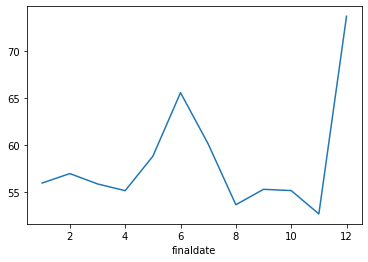

In [105]:
dfCarAndDriver['headline'].str.len().groupby(by=dfCarAndDriver.index.month).mean().plot()

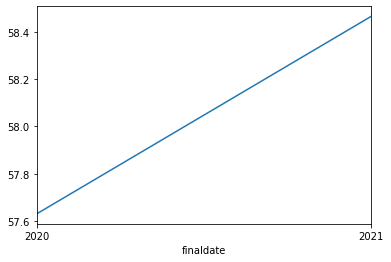

In [106]:
dfCarAndDriver['headline'].str.len().resample('A').mean().plot() 

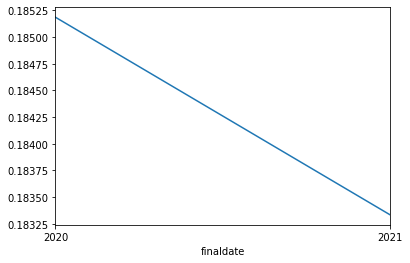

In [107]:
dfCarAndDriver['positivity'].resample('A').mean().plot() 

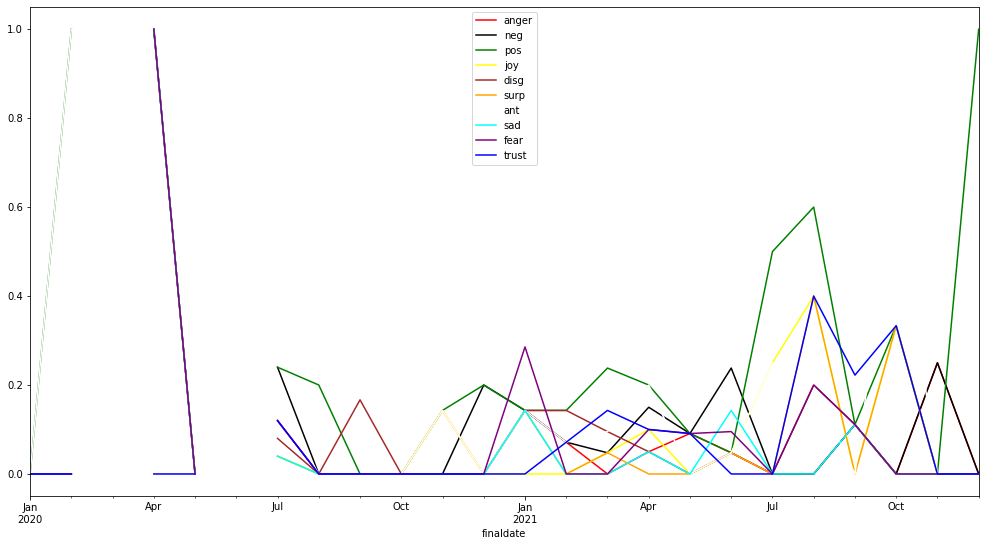

In [108]:
ax = dfCarAndDriver['anger'].resample('M').mean().plot(figsize=(16,7), 
                                                          color = 'red', label='anger')

dfCarAndDriver['negative'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'neg', color = 'black')

dfCarAndDriver['positivity'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'pos', color = 'green')

dfCarAndDriver['joy'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'joy', color = 'yellow')

dfCarAndDriver['disgust'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'disg', color = 'brown')

dfCarAndDriver['surprise'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'surp', color = 'orange')

dfCarAndDriver['anticipation'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'ant', color = 'white')

dfCarAndDriver['sadness'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'sad', color = 'cyan')

dfCarAndDriver['fear'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'fear', color = 'purple')

dfCarAndDriver['trust'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

In [109]:
dfCarAndDriver[['anger','positivity','joy','disgust','surprise','trust','anticipation','sadness','negative','fear']].sum()

anger           11
positivity      32
joy             10
disgust         13
surprise         8
trust           15
anticipation    19
sadness          8
negative        22
fear            13
dtype: int64

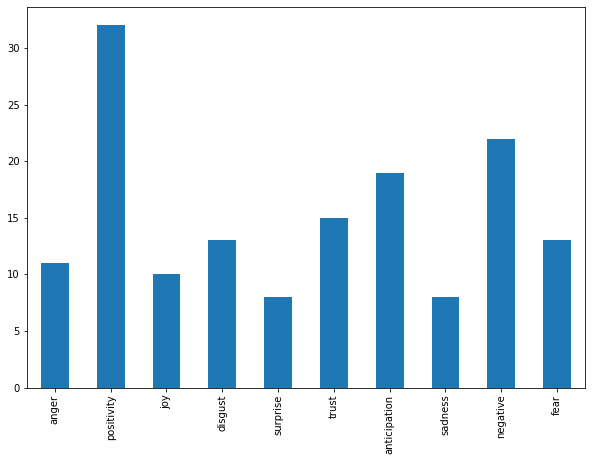

In [110]:
dfCarAndDriver[['anger','positivity','joy','disgust','surprise','trust','anticipation','sadness','negative','fear']].sum().plot(kind = 'bar', figsize=(10,7))